# Aplicação do Autoencoder utilizando o dataset MNIST com Keras e posterior classificação dos dados processados

#### Importação das libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense, Input, Dropout
from keras.models import Model, Sequential

2025-07-31 00:49:56.098457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753933796.118091   99163 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753933796.123608   99163 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753933796.140632   99163 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753933796.140652   99163 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753933796.140654   99163 computation_placer.cc:177] computation placer alr

#### Carregamento e tratamento dos dados

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)

val_max = x_train.max()
print(val_max)

(60000, 28, 28)
(10000, 28, 28)
255


In [3]:
# Normalizar os valores dos pixels para o intervalo [0, 1]
x_train = x_train / val_max
x_test = x_test / val_max

In [4]:
# Transformar as imagens em vetores unidimensionais (784 pixels)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
# Criação de um novo vetor de treinamento mas aplicando ruído na imagem
factor = 0.3
x_train_noisy = x_train + factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


#### Visualizar algumas imagens do treinamento

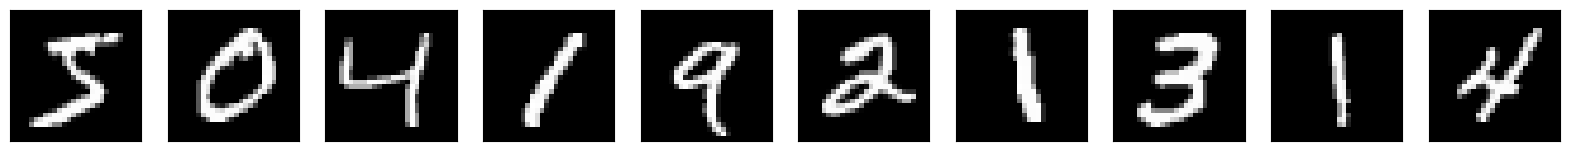

In [6]:
# Visualização antes da criação do vetor com ruído
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem de entrada com ruído
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

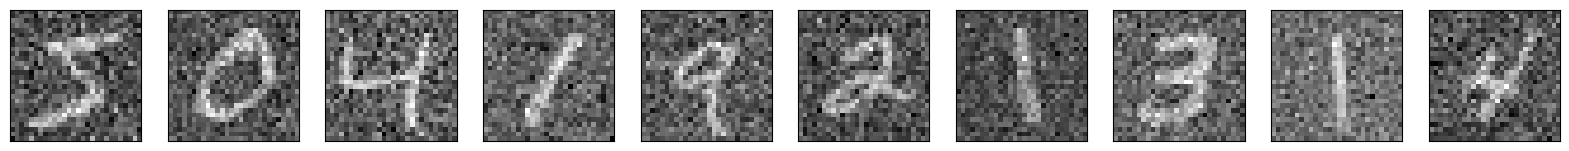

In [7]:
# Visualização do vetor com ruído
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem de entrada com ruído
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Construção do modelo Autoencoder com dados originais

In [8]:
# Definição da dimensão da representação codificada
n_latent = 80

# Criando o modelo do Autoencoder
model = Sequential()
# Primeira camada -> definição da dimensão de entrada (784)
model.add(Dense(units=600, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(units=400, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=n_latent, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=400, activation='relu'))
model.add(Dense(units=600, activation='relu'))
# A última camada (camada de saída) deve ter a quantidade de neurônios igual ao tamanho da entrada (784)
# Para a função de ativação na camada de saída, utilizamos a função sigmoid
model.add(Dense(units = x_train.shape[1], activation='sigmoid'))

# Compilação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy')

/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753933802.809559   99163 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5425 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1


#### Treinamento com os dados originais e validação do modelo treinado com dados sem ruídos

In [9]:
# Treinar o Autoencoder
model.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Codificando e decodificando as imagens de teste sem ruído
encoded_imgs = model.predict(x_test)

Epoch 1/30


I0000 00:00:1753933806.901419   99235 service.cc:152] XLA service 0x7b9f6c007f10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753933806.901500   99235 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1060, Compute Capability 6.1
2025-07-31 00:50:06.944806: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1753933807.386337   99235 cuda_dnn.cc:529] Loaded cuDNN version 90300


 29/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4715

I0000 00:00:1753933808.908485   99235 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.2076 - val_loss: 0.1389
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1235 - val_loss: 0.1109
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1059 - val_loss: 0.1001
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0975 - val_loss: 0.0948
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0923 - val_loss: 0.0897
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0888 - val_loss: 0.0877
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0865 - val_loss: 0.0861
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0846 - val_loss: 0.0837
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0830 - val_loss: 0.0826
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0818 - val_loss: 0.0816
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0807 - val_loss: 0.0803
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0

#### Gráfico comparativo de dados original e dados gerados em forma de imagem - Sem ruído gerado

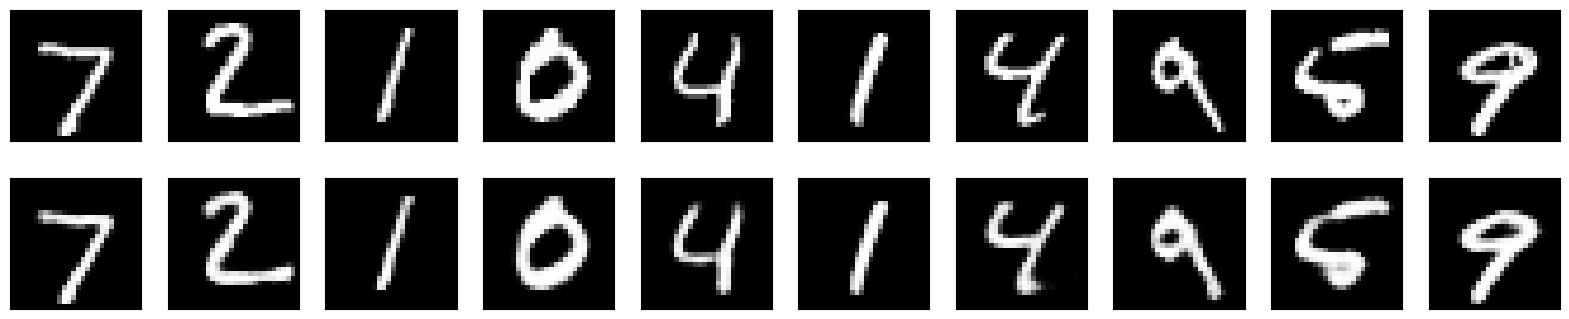

In [10]:
# Visualizar algumas imagens originais sem ruído e reconstruídas
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
  # Imagem original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  # Imagem reconstruída
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
plt.show()

#### Validação com dados com ruído usando o mesmo modelo treinado original

In [11]:
# Codificando e decodificando as imagens de teste com ruído
encoded_imgs = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


#### Gráfico comparativo de dados original e dados gerados em forma de imagem - com ruído gerado

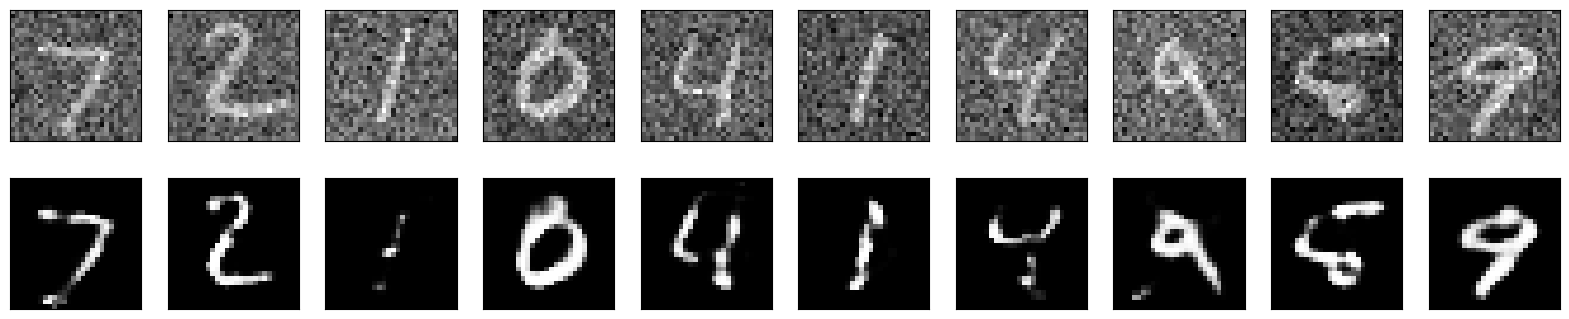

In [12]:
# Visualização de algumas imagens originais com ruído e reconstituídas
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # Imagem de entrada com ruído
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  # Imagem reconstituída com redução de ruído
  ax = plt.subplot(2, n, i + 1 + n)
  ax.imshow(encoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

#### Criando um modelo de classificação  para testar as amostras ruidosas, amostras originais e as amostras recuperadas do ruído

In [13]:
# Dropout = 0.45
dropout = 0.45
num_labels = len(np.unique(y_train))


model2 = Sequential()
model2.add(Dense(units=500, input_dim=x_train.shape[1], activation='relu'))
model2.add(Dropout(dropout)) # Essa camada ajuda a evitar overfitting durante o treinamento, desligando aleatoriamente um certo número de neurônios durante cada passagem de treinamento
model2.add(Dense(units=200, activation='relu'))
model2.add(Dropout(dropout))
# A função de ativação é softmax pois neste caso temos 10 rótulos como resultado da camada de saída
model2.add(Dense(units=num_labels, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model2.fit(x_train, y_train, epochs=40, batch_size=256)

Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8643 - loss: 0.4378
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9441 - loss: 0.1863
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9588 - loss: 0.1387
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9659 - loss: 0.1140
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9706 - loss: 0.0969
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0856
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9772 - loss: 0.0753
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.0687
Epoch 9/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9788 - loss: 0.0668
Epoch 10/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9820 - loss: 0.0574
Epoch 11/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9831 - loss: 0.0534
Epoch 12/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

In [20]:
loss, acc = model2.evaluate(x_test, y_test)
print("Teste de Acurácia Classificação sem Ruído: %.1f%%\n" % (100.0 * acc))
loss, acc = model2.evaluate(x_test_noisy, y_test)
print("Teste de Acurácia Classificação com Ruído: %.1f%%\n" % (100.0 * acc))
loss, acc = model2.evaluate(encoded_imgs, y_test)
print("Teste de Acurácia Classificação das Imagens Recuperadas do ruído: %.1f%%" % (100.0 * acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9857 - loss: 0.0624
Teste de Acurácia Classificação sem Ruído: 98.6%

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9368 - loss: 0.3199
Teste de Acurácia Classificação com Ruído: 93.7%

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9119 - loss: 0.3915
Teste de Acurácia Classificação das Imagens Recuperadas do ruído: 91.2%


#### Apresentando as métricas com SKLEARN

In [21]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Avaliação da Classificação
Acurácia: 0.9857
MSE:  0.2665
Matriz de confusão das amostras não apresentadas no treinamento:
 [[ 971    1    1    1    1    0    2    1    1    1]
 [   0 1128    3    0    0    0    2    0    2    0]
 [   0    1 1019    0    2    0    2    4    3    1]
 [   0    0    6  996    0    2    0    3    3    0]
 [   0    0    0    0  966    0    6    1    0    9]
 [   2    0    0    3    1  879    2    1    3    1]
 [   2    2    0    0    4    3  947    0    0    0]
 [   1    3    9    1    0    0    0 1007    3    4]
 [   1    1    4    3    1    3    1    2  956    2]
 [   0    2    0    2    9    2    0    3    3  988]]

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3  

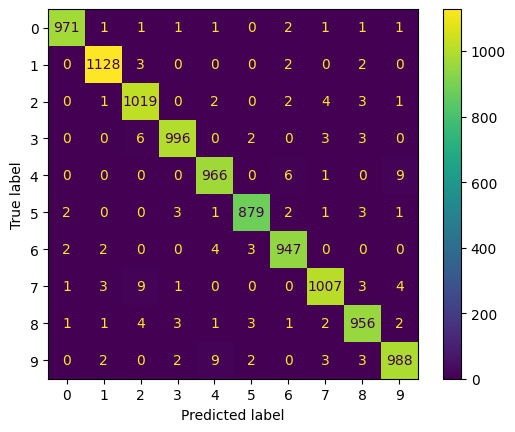

In [17]:
y_pred = model2.predict(x_test)

# Converter as previsões para classes
y_pred = np.argmax(y_pred, axis=1)

print("Avaliação da Classificação")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")
print("")
relatorio = classification_report(y_test, y_pred, target_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)
print("")

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
cm_display.plot()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Avaliação da Classificação
Acurácia: 0.9368
MSE:  1.0777
Matriz de confusão das amostras não apresentadas no treinamento:
 [[ 946    1   10    0    3    7    5    4    2    2]
 [   0 1045   19   24    2    8    5   22   10    0]
 [   1    3  988   13    2    1    3   15    6    0]
 [   2    0    8  971    0   10    0    9    8    2]
 [   0    3    4    3  912    7   12    4    8   29]
 [   3    2    0   18    1  849    6    1    7    5]
 [   5    2    5    0    5   16  922    0    3    0]
 [   2    4   16   12    6    3    0  970    4   11]
 [   2    5   15   32    3   17    4    5  881   10]
 [   1    3    3   20   39   11    3   28   17  884]]

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       980
           1       0.98      0.92      0.95      1135
           2       0.93      0.96      0.94      1032
           3  

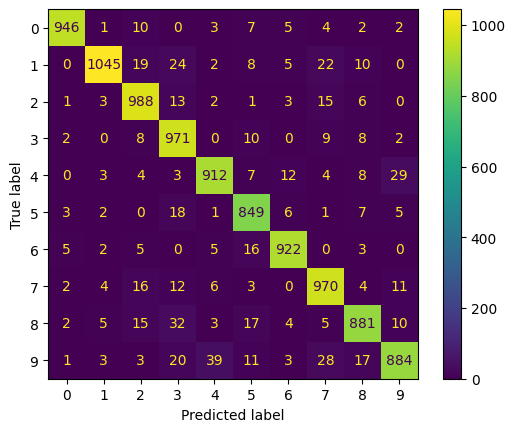

In [18]:
y_pred = model2.predict(x_test_noisy)

# Converter as previsões para classes
y_pred = np.argmax(y_pred, axis=1)

print("Avaliação da Classificação")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")
print("")
relatorio = classification_report(y_test, y_pred, target_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)
print("")

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
cm_display.plot()
plt.show()